## Importing Libraries and  Data Reading

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)

%matplotlib inline
sns.set()

In [2]:
# importing dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
# checking the dimensions of the dataframe
df.shape

(1338, 7)

In [4]:
# Checking missing value in dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Column Children should be object column
df['children'] = df['children'].astype('object')

In [7]:
df.describe()

,age,bmi,expenses
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,13270.422414
std,14.049960,6.098382,12110.011240
min,18.000000,16.000000,1121.870000
25%,27.000000,26.300000,4740.287500
50%,39.000000,30.400000,9382.030000
75%,51.000000,34.700000,16639.915000
max,64.000000,53.100000,63770.430000


In [8]:
df.corr()

,age,bmi,expenses
age,1.000000,0.109341,0.299008
bmi,0.109341,1.000000,0.198576
expenses,0.299008,0.198576,1.000000


## Data Visualization

### Univariate Analysis


In [9]:

#numerical columns
num_cols = df.select_dtypes(exclude = 'object')
num_cols.columns

Index(['age', 'bmi', 'expenses'], dtype='object')

<Figure size 1080x432 with 0 Axes>

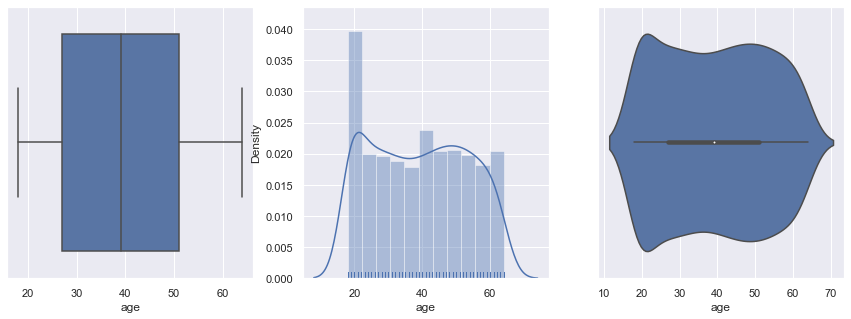

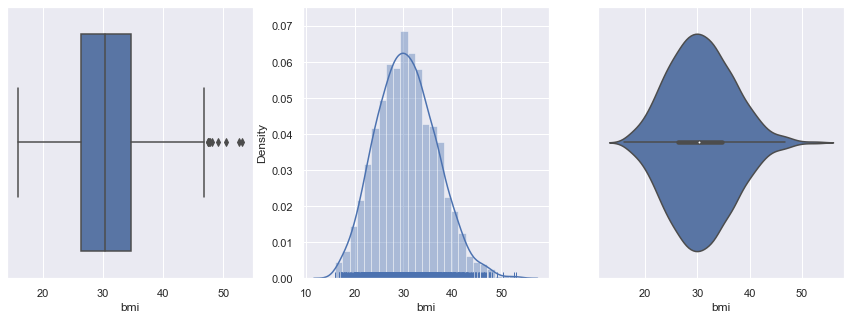

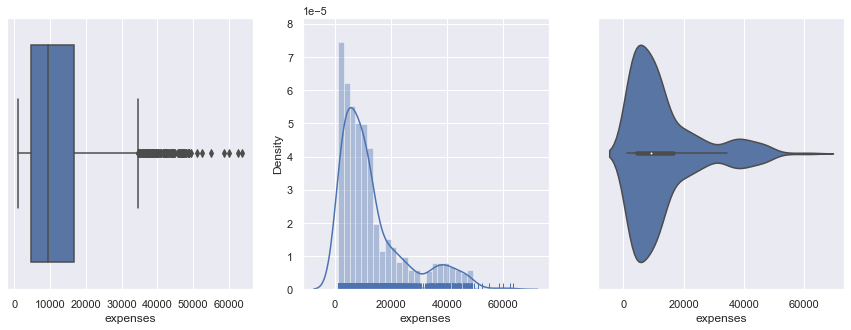

In [10]:
plt.figure(figsize = (15,6))
f_num = num_cols.columns[:]
for i in enumerate(f_num):
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(131)
    sns.boxplot(num_cols[i[1]])

    ax1 = f.add_subplot(132)
    sns.distplot(num_cols[i[1]], rug = True)
    
    ax2 = f.add_subplot(133)
    sns.violinplot(num_cols[i[1]], orient= 'vertical')
    plt.show()

In [11]:
#categorical columns
cat_cols = df.select_dtypes(include = 'object')
cat_cols.columns

Index(['sex', 'children', 'smoker', 'region'], dtype='object')

<Figure size 1080x720 with 0 Axes>

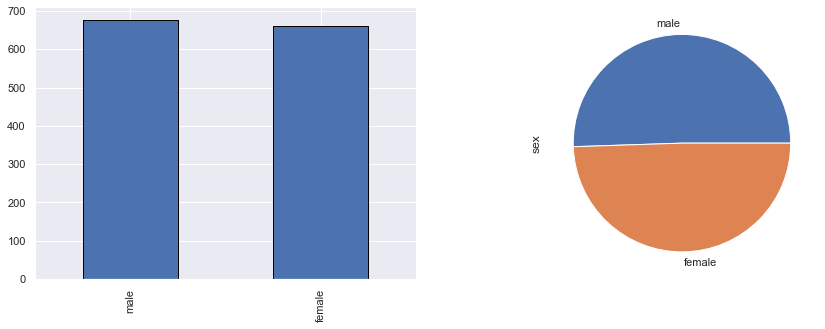

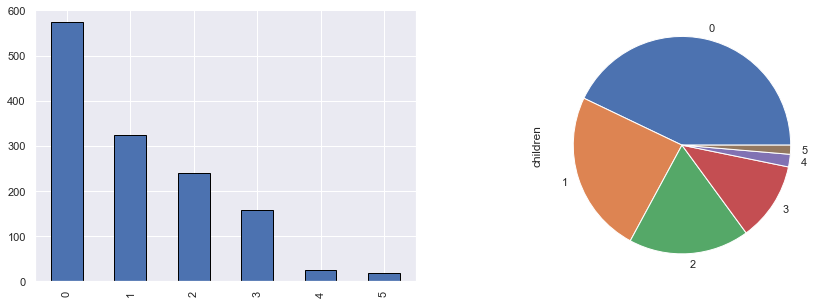

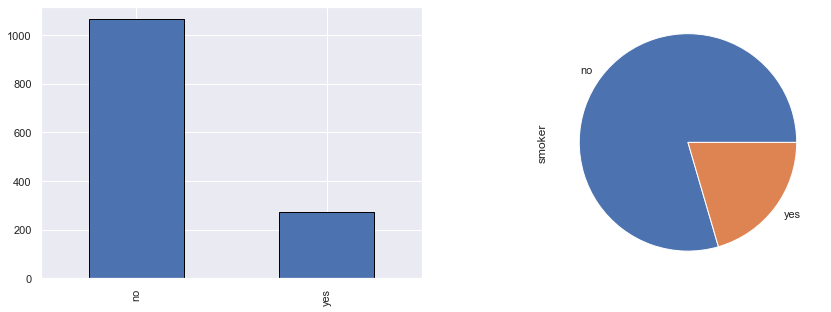

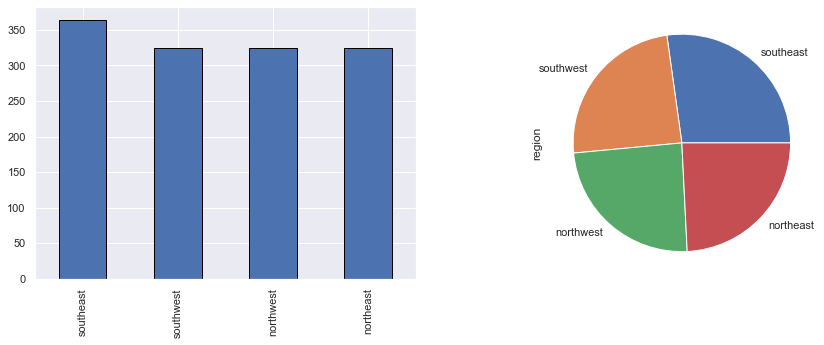

In [12]:
plt.figure(figsize = (15,10))
f_cat = cat_cols.columns[:]
for i in enumerate(f_cat):
    
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(121)
    cat_cols[i[1]].value_counts().plot.bar(edgecolor='Black')

    ax1 = f.add_subplot(122)
    cat_cols[i[1]].value_counts().plot.pie()
    plt.show()

### Outlier detection

In [13]:
# Checking quntile values 
for i in num_cols.columns:
    print(i)
    print(num_cols[i].quantile([0.1,0.9,0.95,0.99]))
    print(num_cols[i].describe())
    print('\n')

age
0.10    19.0
0.90    59.0
0.95    62.0
0.99    64.0
Name: age, dtype: float64
count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


bmi
0.10    23.000
0.90    38.630
0.95    41.100
0.99    46.389
Name: bmi, dtype: float64
count    1338.000000
mean       30.665471
std         6.098382
min        16.000000
25%        26.300000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64


expenses
0.10     2346.5350
0.90    34831.7160
0.95    41181.8260
0.99    48537.4806
Name: expenses, dtype: float64
count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: expenses, dtype: float64




### Inferences:
No need of outlier treatment

### Bivariate Analysis(Numerical columns)

<Figure size 1080x720 with 0 Axes>

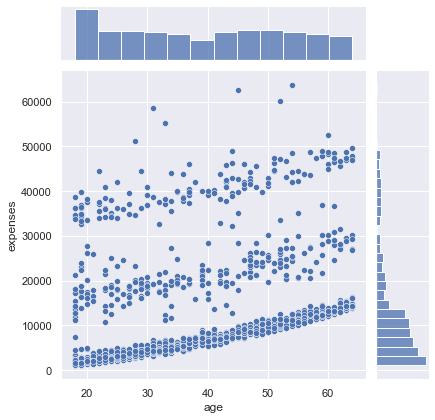

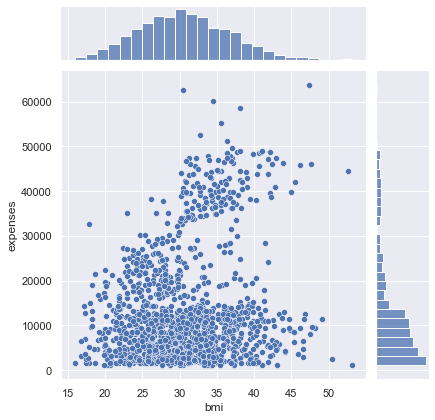

In [14]:
plt.figure(figsize = (15,10))
f_num = num_cols.columns[:-1]
for i in enumerate(f_num):
    sns.jointplot(num_cols[i[1]],y= df.expenses, kind = 'scatter')
    plt.show()

### Bivariate Analysis(Categorical columns)

<Figure size 1080x576 with 0 Axes>

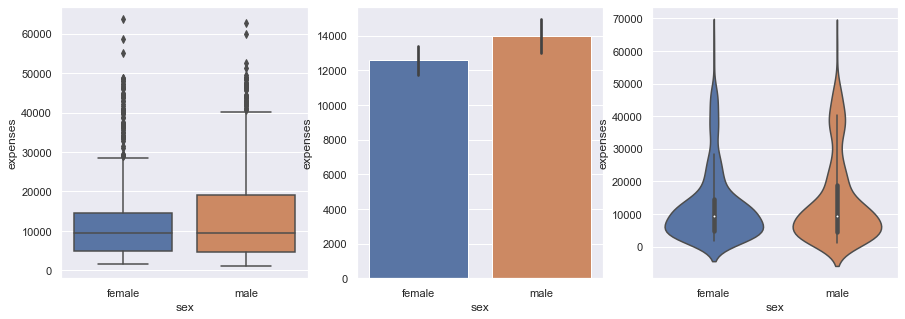

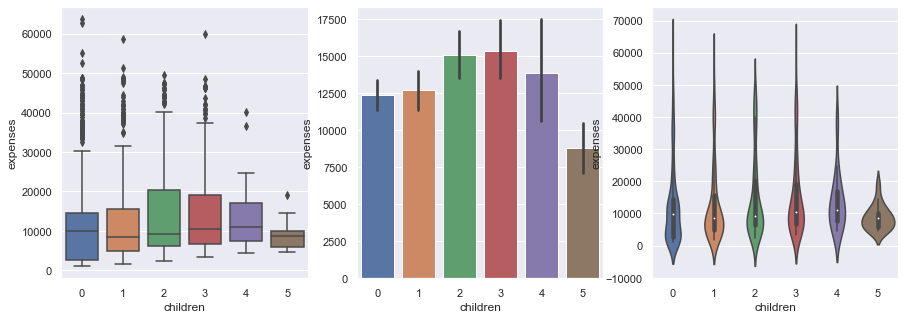

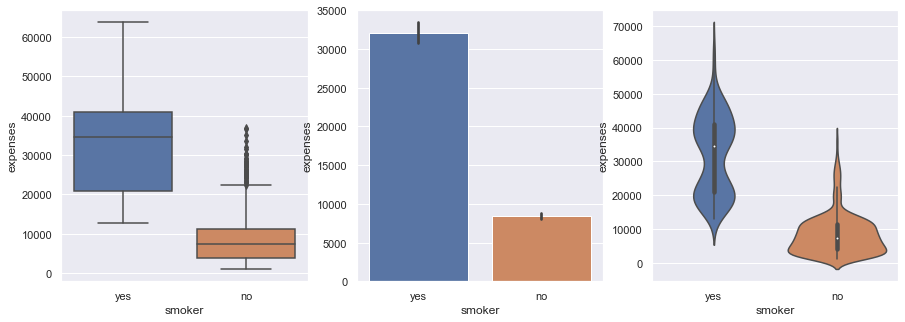

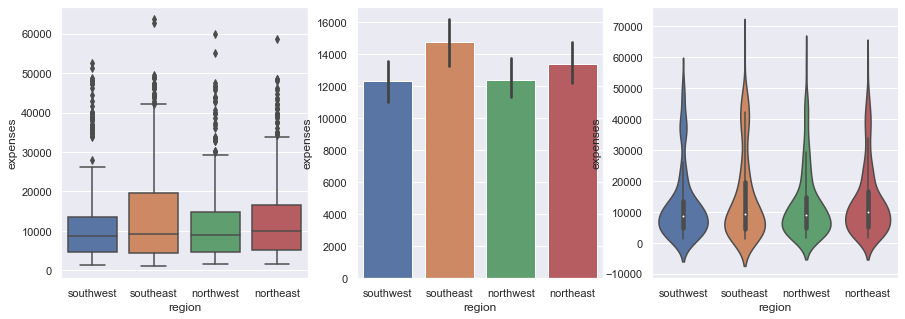

In [15]:
plt.figure(figsize = (15,8))

f_cat = cat_cols.columns[:]

for i in enumerate(f_cat):
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(131)
    sns.boxplot(x = cat_cols[i[1]], y= df.expenses)

    ax1 = f.add_subplot(132)
    sns.barplot(x = cat_cols[i[1]], y= df.expenses)
    
    ax2 = f.add_subplot(133)
    sns.violinplot(x = cat_cols[i[1]], y= df.expenses, orient= 'vertical')
    
    plt.show()

### Multivariate Analysis


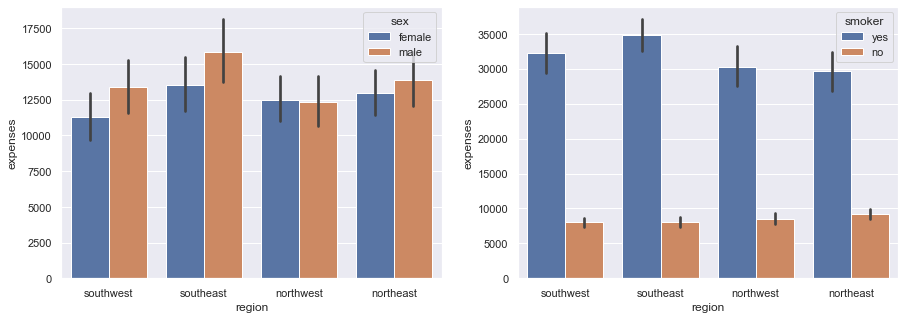

In [16]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.barplot(df.region, df.expenses, hue = df.sex)

ax1 = f.add_subplot(122)
sns.barplot(df.region, df.expenses, hue = df.smoker)
plt.show()

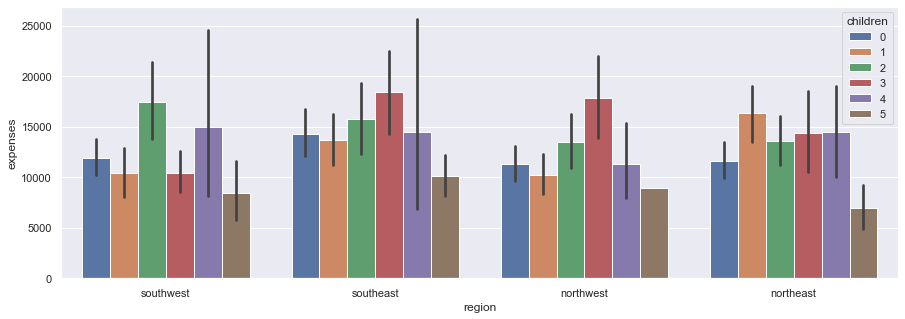

In [17]:
plt.figure(figsize=(15,5))
sns.barplot(df.region, df.expenses, hue = df.children)
plt.show()

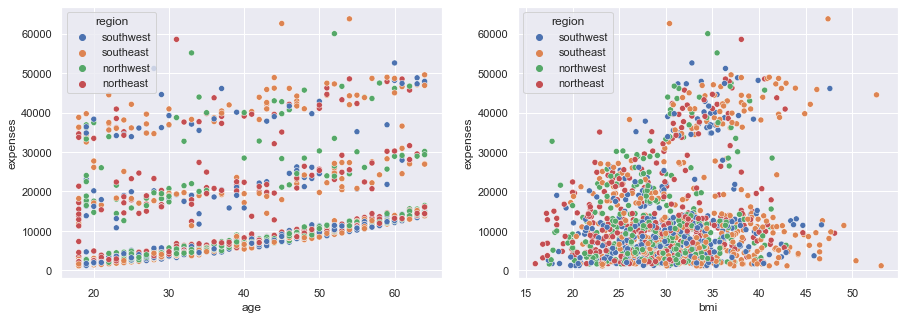

In [18]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.scatterplot(df.age, df.expenses, hue = df.region)

ax1 = f.add_subplot(122)
sns.scatterplot(df.bmi, df.expenses, hue = df.region)
plt.show()

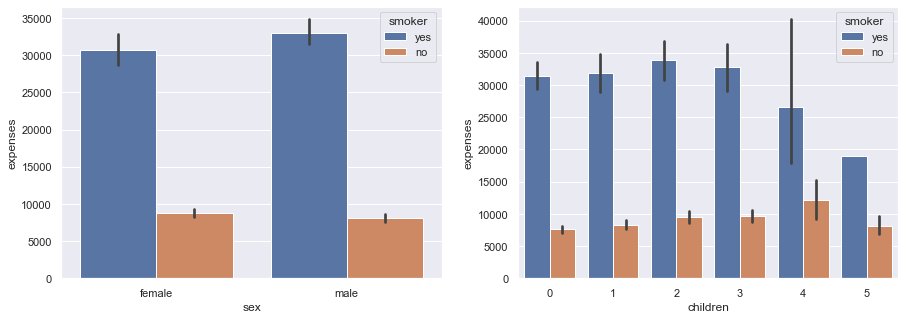

In [19]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.barplot(df.sex, df.expenses, hue = df.smoker)

ax1 = f.add_subplot(122)
sns.barplot(df.children, df.expenses, hue = df.smoker)
plt.show()

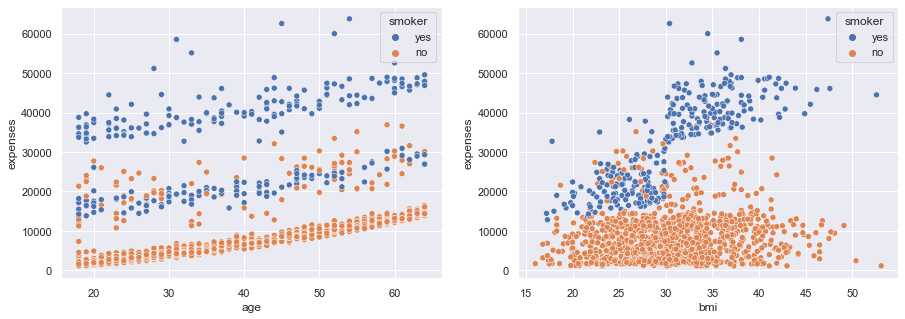

In [20]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.scatterplot(df.age, df.expenses, hue = df.smoker)

ax1 = f.add_subplot(122)
sns.scatterplot(df.bmi, df.expenses, hue = df.smoker)
plt.show()

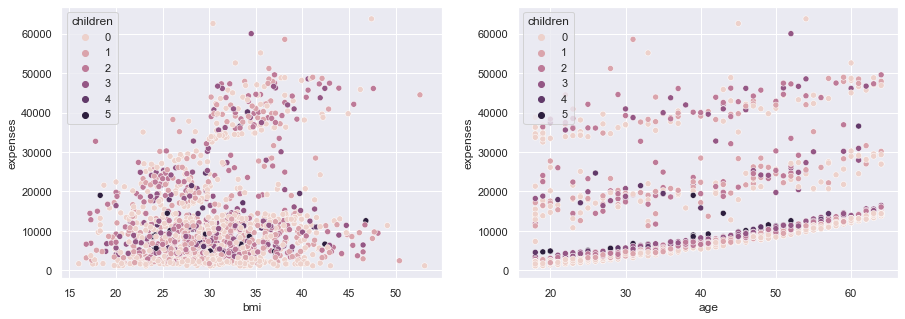

In [21]:
f = plt.figure(figsize=(15,5))

ax1 = f.add_subplot(121)
sns.scatterplot(df.bmi, df.expenses, hue = df.children)

ax2 = f.add_subplot(122)
sns.scatterplot(df.age, df.expenses, hue = df.children)
plt.show()

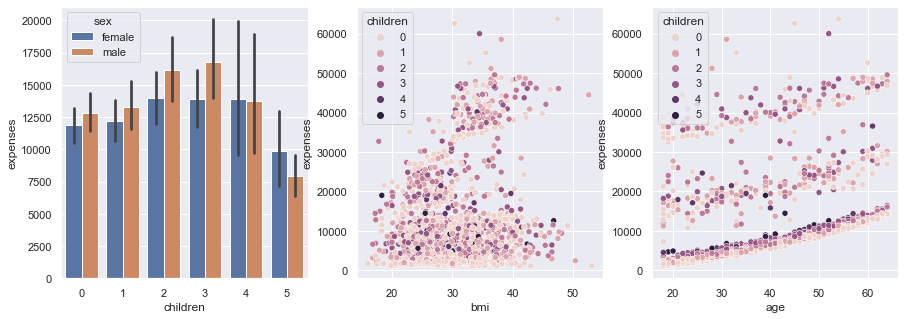

In [22]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(131)
sns.barplot(df.children, df.expenses, hue = df.sex)

ax1 = f.add_subplot(132)
sns.scatterplot(df.bmi, df.expenses, hue = df.children)

ax2 = f.add_subplot(133)
sns.scatterplot(df.age, df.expenses, hue = df.children)
plt.show()

### Target Variable- Expenses

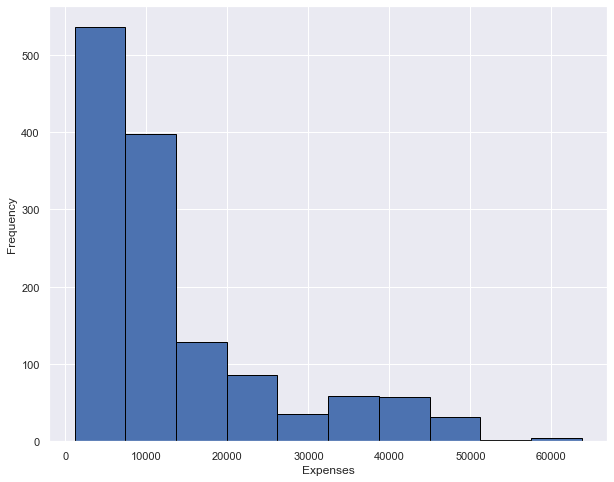

In [23]:
plt.figure(figsize = (10,8))
plt.hist(df['expenses'], edgecolor = 'black')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.show()

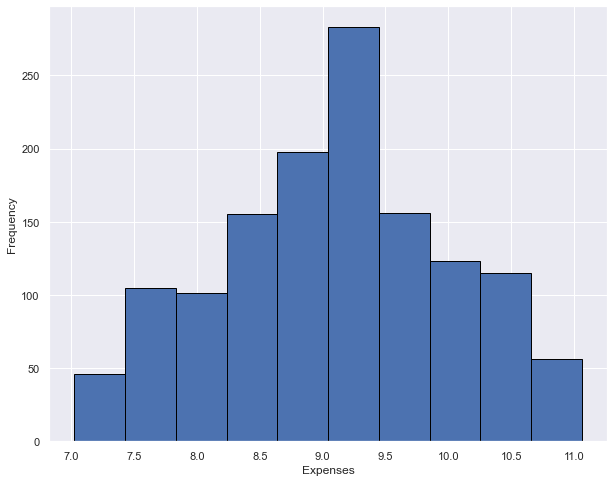

In [24]:
# Using log Transformation

df['expenses'] = np.log1p(df['expenses'])

# Plotting histogram

plt.figure(figsize = (10,8))
plt.hist(df['expenses'], edgecolor = 'black')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.show()

### Data Visualization(Pairplot and Heatmap)


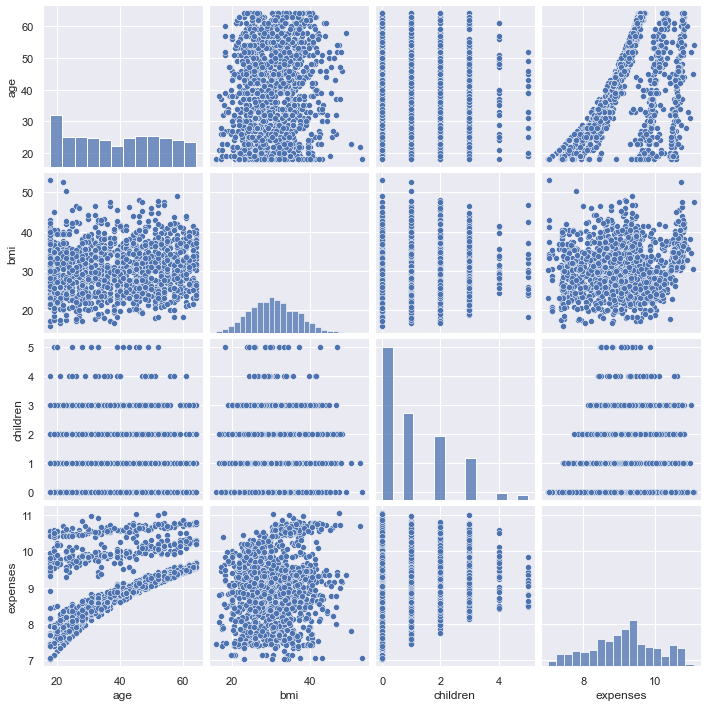

In [25]:
sns.pairplot(df)
plt.show()

## Feature Engineering

In [26]:
print(df.head())
df.info()

   age     sex   bmi children smoker     region  expenses
0   19  female  27.9        0    yes  southwest  9.734235
1   18    male  33.8        1     no  southeast  7.453880
2   28    male  33.0        3     no  southeast  8.400763
3   33    male  22.7        0     no  northwest  9.998137
4   32    male  28.9        0     no  northwest  8.260457
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB


In [27]:
#ONE HOT ENCODING
# Column sex
sex_dummies = pd.get_dummies(df.sex, drop_first= True)

df = pd.concat([df, sex_dummies], axis = 1)

# Column smoker

smoker_dummies = pd.get_dummies(df.smoker, drop_first= True)

df = pd.concat([df, smoker_dummies], axis = 1)

# Column region
region_dummies = pd.get_dummies(df.region,prefix = 'region_', drop_first= True)

df = pd.concat([df, region_dummies], axis = 1)

In [28]:
df.head()

,age,sex,bmi,children,smoker,region,expenses,male,yes,region__northwest,region__southeast,region__southwest
0,19,female,27.9,0,yes,southwest,9.734235,0,1,0,0,1
1,18,male,33.8,1,no,southeast,7.453880,1,0,0,1,0
2,28,male,33.0,3,no,southeast,8.400763,1,0,0,1,0
3,33,male,22.7,0,no,northwest,9.998137,1,0,1,0,0
4,32,male,28.9,0,no,northwest,8.260457,1,0,1,0,0


In [29]:
df=df.drop('sex', axis=1)
df=df.drop('smoker', axis=1)
df=df.drop('region', axis=1)
df.head()

,age,bmi,children,expenses,male,yes,region__northwest,region__southeast,region__southwest
0,19,27.9,0,9.734235,0,1,0,0,1
1,18,33.8,1,7.453880,1,0,0,1,0
2,28,33.0,3,8.400763,1,0,0,1,0
3,33,22.7,0,9.998137,1,0,1,0,0
4,32,28.9,0,8.260457,1,0,1,0,0


In [30]:
df['children']=df['children'].astype(int)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1338 non-null   int64  
 1   bmi                1338 non-null   float64
 2   children           1338 non-null   int32  
 3   expenses           1338 non-null   float64
 4   male               1338 non-null   uint8  
 5   yes                1338 non-null   uint8  
 6   region__northwest  1338 non-null   uint8  
 7   region__southeast  1338 non-null   uint8  
 8   region__southwest  1338 non-null   uint8  
dtypes: float64(2), int32(1), int64(1), uint8(5)
memory usage: 43.2 KB


In [32]:
df['expenses'] = np.expm1(df['expenses'])

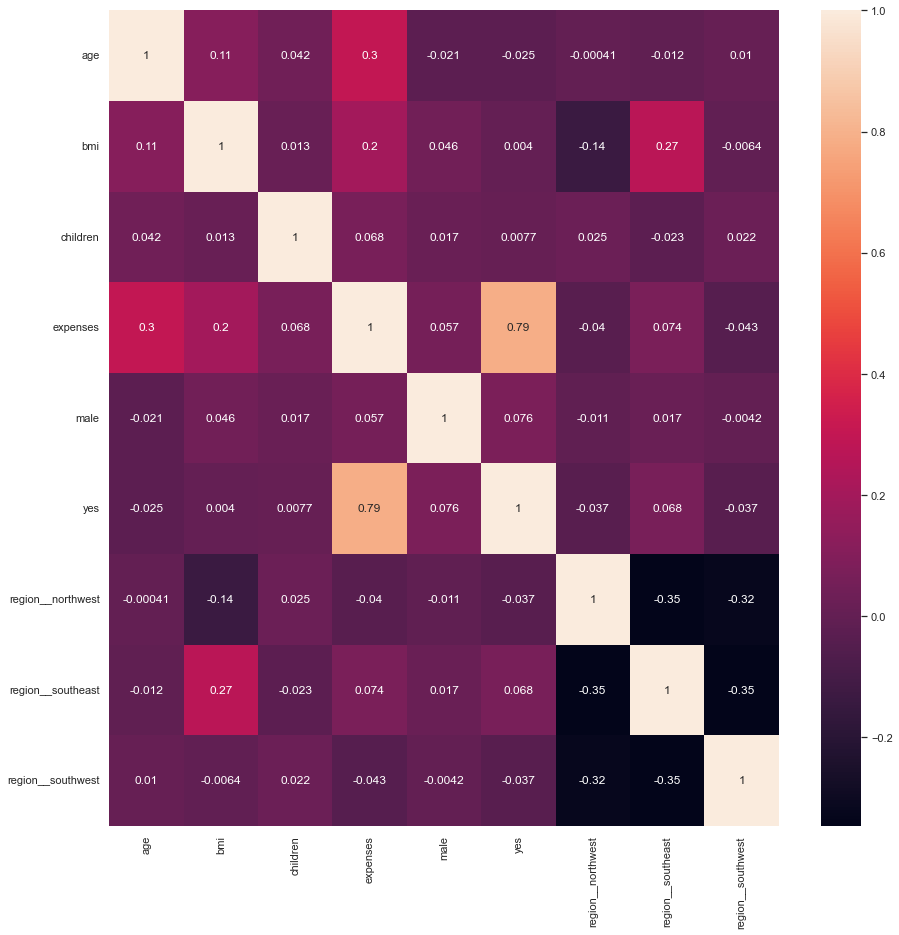

In [33]:
# Plotting Pearson Correlation matrix
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True)
plt.show()

### Inferences:
* Smoker_yes and age are positively correlated with target variable Expenses
* bmi and region_southwest are positively correlated.
* bmi and age are positively correlated.

### Train Test Split

In [34]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(936, 9)
(402, 9)


### Feature Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train_sc = scaler.fit_transform(df_train)
df_test_sc = scaler.transform(df_test)

In [36]:
df_train_sc = pd.DataFrame(df_train_sc, columns = df_train.columns)
df_train_sc.head()

,age,bmi,children,expenses,male,yes,region__northwest,region__southeast,region__southwest
0,0.717391,0.237197,0.4,0.364661,1.0,1.0,1.0,0.0,0.0
1,0.717391,0.482480,0.0,0.139579,0.0,0.0,0.0,0.0,0.0
2,0.565217,0.633423,0.0,0.093008,1.0,0.0,1.0,0.0,0.0
3,0.239130,0.409704,0.0,0.045041,0.0,0.0,0.0,0.0,0.0
4,0.434783,0.358491,0.4,0.085173,1.0,0.0,1.0,0.0,0.0


In [37]:
df_test_sc = pd.DataFrame(df_test_sc, columns = df_test.columns)
df_test_sc.head()

,age,bmi,children,expenses,male,yes,region__northwest,region__southeast,region__southwest
0,0.108696,0.495957,0.0,0.011253,1.0,0.0,0.0,0.0,1.0
1,0.217391,0.309973,0.4,0.304170,0.0,0.0,0.0,0.0,1.0
2,0.565217,0.312668,0.0,0.100550,0.0,0.0,1.0,0.0,0.0
3,0.043478,0.417790,0.0,0.012068,0.0,0.0,0.0,1.0,0.0
4,0.000000,0.247978,0.0,0.229795,1.0,1.0,0.0,0.0,0.0


In [38]:
y_train_sc = df_train_sc['expenses']
X_train_sc = df_train_sc.drop('expenses',axis=1)
y_test_sc = df_test_sc['expenses']
X_test_sc = df_test_sc.drop('expenses',axis=1)

In [39]:
X_train_sc.head()

,age,bmi,children,male,yes,region__northwest,region__southeast,region__southwest
0,0.717391,0.237197,0.4,1.0,1.0,1.0,0.0,0.0
1,0.717391,0.482480,0.0,0.0,0.0,0.0,0.0,0.0
2,0.565217,0.633423,0.0,1.0,0.0,1.0,0.0,0.0
3,0.239130,0.409704,0.0,0.0,0.0,0.0,0.0,0.0
4,0.434783,0.358491,0.4,1.0,0.0,1.0,0.0,0.0


In [40]:
y_train_sc.head()

0    0.364661
1    0.139579
2    0.093008
3    0.045041
4    0.085173
Name: expenses, dtype: float64

## Ridge Regression

In [41]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge = Ridge(alpha=0.1)
         
ridge.fit(X_train_sc, y_train_sc)

Ridge(alpha=0.1)

In [42]:
ridge.coef_ 


array([ 1.90733346e-01,  1.70969086e-01,  3.76695394e-02,  1.95848414e-05,
        3.82650098e-01, -1.20332596e-02, -1.49110286e-02, -2.54862092e-02])

In [43]:
ridge_df = pd.DataFrame({'Features':X_train_sc.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.set_index('Features',drop=True, inplace=True)
ridge_df.sort_values(by='Coefficient',ascending=False,inplace=True)

In [44]:
ridge_df

,Coefficient
Features,
yes,0.3827
age,0.1907
bmi,0.1710
children,0.0377
male,0.0000
region__northwest,-0.0120
region__southeast,-0.0149
region__southwest,-0.0255


<AxesSubplot:title={'center':'Feature importance by Ridge'}, ylabel='Features'>

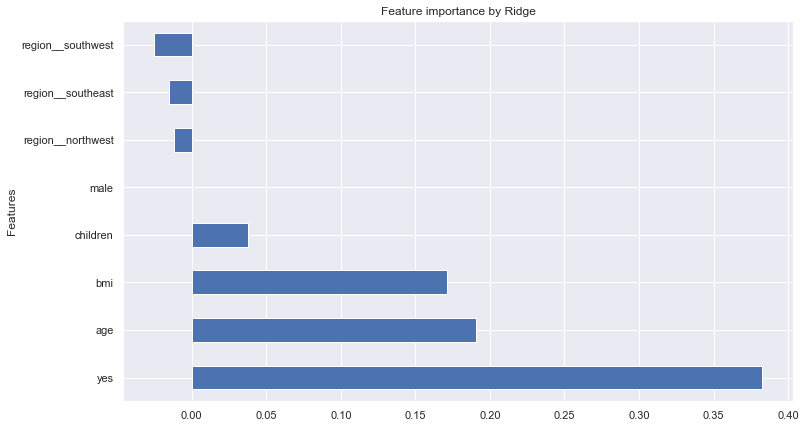

In [45]:
ridge_df['Coefficient'].plot(kind='barh',title = 'Feature importance by Ridge',figsize=(12,7))


In [46]:
# predictions on the data
y_pred_train_ridge= ridge.predict(X_train_sc)  
y_pred_test_ridge= ridge.predict(X_test_sc)  

In [47]:
from sklearn.metrics import r2_score,mean_squared_error

# Function for adjusted r2_score

def adjusted_r2_score(data,y_true,y_pred):
    r2 = r2_score(y_true,y_pred)
    n = data.shape[0]
    p = data.shape[1]
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2
#function for rmse

def rmse(y_true,y_pred):
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    return rmse

In [48]:
print('R2 score of train data is ',r2_score(y_train_sc,y_pred_train_ridge))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_sc,y_train_sc,y_pred_train_ridge))
print('rmse score of train data is ',rmse(y_train_sc,y_pred_train_ridge))
print()
print('R2 score of test data is ',r2_score(y_test_sc,y_pred_test_ridge))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_sc,y_test_sc,y_pred_test_ridge))
print('rmse score of test data is ',rmse(y_test_sc,y_pred_test_ridge))

R2 score of train data is  0.7378847326611477
Adj. R2 score of train data is  0.7356226807315784
rmse score of train data is  0.0991108695747915

R2 score of test data is  0.7771812991697324
Adj. R2 score of train data is  0.7726455495345107
rmse score of test data is  0.09079137329728215


In [49]:
#Storing the result in a dataframe

results = pd.DataFrame(columns = ['Algorithm','Train_R2 score','Train_Adj_R2 score','Train_RMSE score',
                                 'Test_R2 score','Test_Adj_R2 score','Test_RMSE score'])
results.loc[len(results)] = ['Ridge Regression',r2_score(y_train_sc,y_pred_train_ridge),
                             adjusted_r2_score(X_train_sc,y_train_sc,y_pred_train_ridge),
                             rmse(y_train_sc,y_pred_train_ridge),r2_score(y_test_sc,y_pred_test_ridge),
                             adjusted_r2_score(X_test_sc,y_test_sc,y_pred_test_ridge),rmse(y_test_sc,y_pred_test_ridge)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Ridge Regression,0.737885,0.735623,0.099111,0.777181,0.772646,0.090791


## Lasso CV  Regression

In [50]:

from sklearn.linear_model import LassoCV

lasso = LassoCV()
lasso.fit(X_train_sc, y_train_sc)
print("Best alpha using built-in LassoCV: %f" % lasso.alpha_)
print("Best score using built-in LassoCV: %f" %lasso.score(X_train_sc,y_train_sc))


Best alpha using built-in LassoCV: 0.000069
Best score using built-in LassoCV: 0.737868


In [51]:
lasso.coef_

array([ 0.19037562,  0.16870229,  0.03658157,  0.        ,  0.38244723,
       -0.01083449, -0.01350723, -0.02419219])

In [52]:
lasso_df = pd.DataFrame({'Features':X_train_sc.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.set_index('Features',drop=True, inplace=True)
lasso_df.sort_values(by='Coefficient',ascending=False,inplace=True)

In [53]:
lasso_df

,Coefficient
Features,
yes,0.3824
age,0.1904
bmi,0.1687
children,0.0366
male,0.0000
region__northwest,-0.0108
region__southeast,-0.0135
region__southwest,-0.0242


<AxesSubplot:title={'center':'Feature importance by Lasso'}, ylabel='Features'>

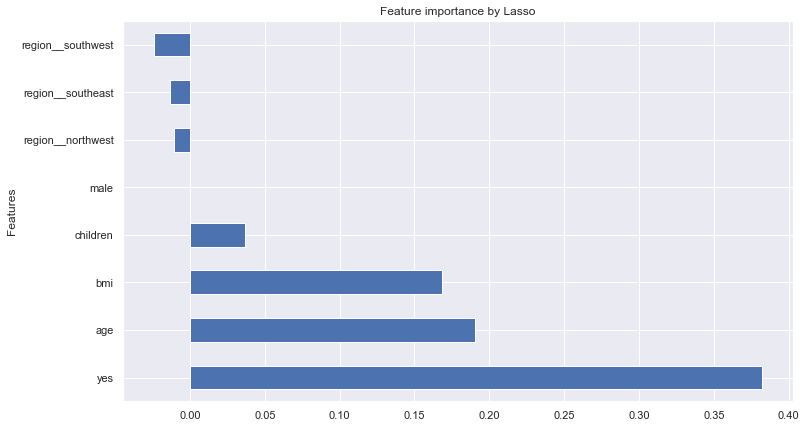

In [54]:
lasso_df['Coefficient'].plot(kind='barh',title = 'Feature importance by Lasso',figsize=(12,7))


In [55]:
# predictions on the data
y_pred_train_lasso= lasso.predict(X_train_sc)  
y_pred_test_lasso= lasso.predict(X_test_sc)  

In [56]:
print('R2 score of train data is ',r2_score(y_train_sc,y_pred_train_lasso))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_sc,y_train_sc,y_pred_train_lasso))
print('rmse score of train data is ',rmse(y_train_sc,y_pred_train_lasso))
print()
print('R2 score of test data is ',r2_score(y_test_sc,y_pred_test_lasso))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_sc,y_test_sc,y_pred_test_lasso))
print('rmse score of test data is ',rmse(y_test_sc,y_pred_test_lasso))

R2 score of train data is  0.7378684744464616
Adj. R2 score of train data is  0.7356062822086749
rmse score of train data is  0.09911394330038058

R2 score of test data is  0.7771517456066158
Adj. R2 score of train data is  0.7726153943721449
rmse score of test data is  0.09079739415550732


In [57]:
#Storing the result in a dataframe
results.loc[len(results)] = ['Lasso Regression',r2_score(y_train_sc,y_pred_train_lasso),
                             adjusted_r2_score(X_train_sc,y_train_sc,y_pred_train_lasso),
                             rmse(y_train_sc,y_pred_train_lasso),r2_score(y_test_sc,y_pred_test_lasso),
                             adjusted_r2_score(X_test_sc,y_test_sc,y_pred_test_lasso),rmse(y_test_sc,y_pred_test_lasso)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Ridge Regression,0.737885,0.735623,0.099111,0.777181,0.772646,0.090791
1,Lasso Regression,0.737868,0.735606,0.099114,0.777152,0.772615,0.090797


## Random Forest Regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()

In [59]:
y = df['expenses']
X = df.drop('expenses',axis=1)
#Train-test-split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=42, shuffle = True)

In [60]:
params = {'n_estimators':[5,10,20,40,80,100,200],
          'criterion':['mse','mae'],
          'max_depth':[2,5,10,20],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,6,8,10],
          'oob_score': [True]}


#randomized search cv
RCV = RandomizedSearchCV(estimator = rf, 
                         param_distributions = params, 
                         n_iter = 10, 
                         scoring = 'r2', 
                         cv = 10, 
                         verbose=5, 
                         random_state=42, 
                         n_jobs=-1, 
                         return_train_score=True)

RCV.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 5, 10, 20],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 4, 8, 12],
                                        'n_estimators': [5, 10, 20, 40, 80, 100,
                                                         200],
                                        'oob_score': [True]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=5)

In [61]:
# Best parameters
print('Best parameters',RCV.best_params_)

# Best estimator
print('Best estimator',RCV.best_estimator_)


# Best score
print('Best score',RCV.best_score_)


Best parameters {'oob_score': True, 'n_estimators': 40, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'mae'}
Best estimator RandomForestRegressor(criterion='mae', max_depth=10, min_samples_leaf=4,
                      n_estimators=40, oob_score=True)
Best score 0.8407271407370531


In [62]:
# Building randomforest regressor with the best estimator 

rf1 = RCV.best_estimator_

rf1.fit(X_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=10, min_samples_leaf=4,
                      n_estimators=40, oob_score=True)

In [63]:
# Feature importances

rf1.feature_importances_

rf1_feature_imp = pd.DataFrame(rf1.feature_importances_, index = X_train.columns, columns = ['Feature_importance'])

rf1_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace = True)

rf1_feature_imp

,Feature_importance
yes,0.390676
age,0.361724
bmi,0.207248
children,0.029417
male,0.004448
region__southeast,0.002874
region__southwest,0.002589
region__northwest,0.001023


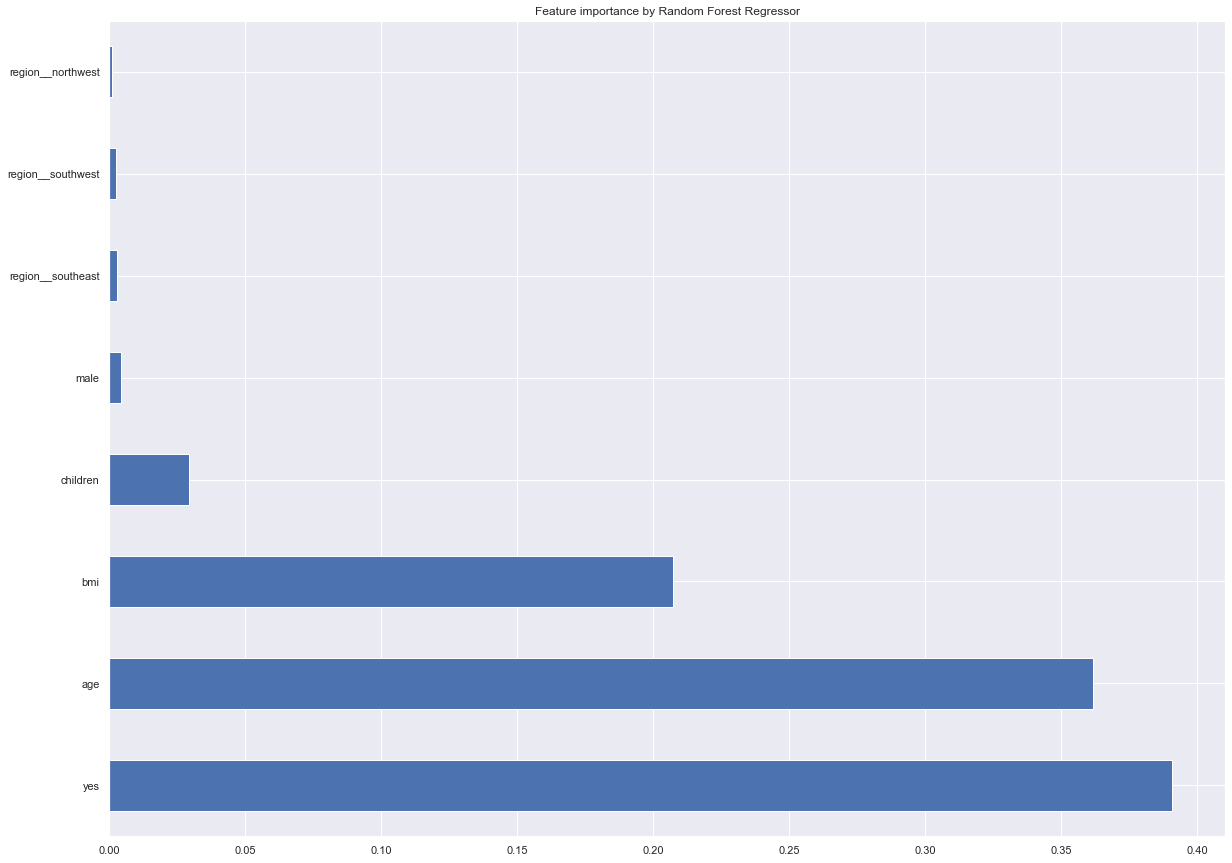

In [64]:
rf1_feature_imp['Feature_importance'].plot(kind='barh', 
                               
                                           title='Feature importance by Random Forest Regressor', 
                                           figsize=(20,15))
plt.show()

### Inference:
* Here some features are contributing less to the Concrete compressive strength prediction. So, let's drop them and consider only the top 5 features.

In [65]:
features_by_rf = ['yes','age','bmi','children','male']

In [66]:
# Considering only the above features

X_train_rf = X_train[features_by_rf]
X_test_rf = X_test[features_by_rf]

In [67]:
# instantiating random forest regressor
rf2 = RandomForestRegressor()

#using Randomized Search CV for hyper parameter tuning
params = {'n_estimators':[5,10,20,40,80,100,200],
          'criterion':['mse','mae'],
          'max_depth':[2,5,10,20],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,6,8,10],
          'oob_score': [True]}

RCV = RandomizedSearchCV(estimator = rf2, 
                         param_distributions = params, 
                         n_iter = 10, 
                         scoring = 'r2', 
                         cv = 10, 
                         verbose=5, 
                         random_state=42, 
                         n_jobs=-1, 
                         return_train_score=True)

RCV.fit(X_train_rf,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 5, 10, 20],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 4, 8, 12],
                                        'n_estimators': [5, 10, 20, 40, 80, 100,
                                                         200],
                                        'oob_score': [True]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=5)

In [68]:
# Rebuilding the random forest regressor using the best estimator suggested by the Randomized Search CV
rf2 = RCV.best_estimator_

# Fitting on the training data
rf2.fit(X_train_rf,y_train)

RandomForestRegressor(criterion='mae', max_depth=20, min_samples_leaf=6,
                      min_samples_split=4, n_estimators=10, oob_score=True)

In [69]:
# Predictions on train data
y_pred_train = rf2.predict(X_train_rf)

In [70]:
# Predictions on test data
y_pred_test = rf2.predict(X_test_rf)

In [71]:
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_rf,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_rf,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.8616903153215069
Adj. R2 score of train data is  0.8609467148662462
rmse score of train data is  4500.888494680727

R2 score of test data is  0.8681347650375352
Adj. R2 score of train data is  0.8664697999496253
rmse score of test data is  4397.118256185061


In [72]:
# Updating the results

results.loc[len(results)] = ['Random Forest regressor',
                             r2_score(y_train,y_pred_train),
                             adjusted_r2_score(X_train_rf,y_train,y_pred_train),
                             rmse(y_train,y_pred_train),
                             r2_score(y_test,y_pred_test),
                             adjusted_r2_score(X_test_rf,y_test,y_pred_test),
                             rmse(y_test,y_pred_test)]

results


,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Ridge Regression,0.737885,0.735623,0.099111,0.777181,0.772646,0.090791
1,Lasso Regression,0.737868,0.735606,0.099114,0.777152,0.772615,0.090797
2,Random Forest regressor,0.861690,0.860947,4500.888495,0.868135,0.866470,4397.118256


In [73]:
import xgboost
from xgboost import XGBRegressor


xgbr = XGBRegressor()

params = {
          'learning_rate': [0.1,0.2,0.5,0.8,1],
          'max_depth': [2,3,4,5,6,7,8,10],
          'subsample': [0.001,0.009,0.01,0.09,0.1,0.4,0.9,1],
          'min_child_weight': [1,2,4,5,8],
          'gamma': [0.0,0.1,0.2,0.3],
          'colsample_bytree': [0.3,0.5,0.7,1.0,1.4],
          'reg_alpha': [0,0.1,0.2,0.4,0.5,0.7,0.9,1,4,8,10,50,100],
          'reg_lambda': [1,4,5,10,20,50,100,200,500,800,1000]
          
         }

# Using Randomized search cv
RCV = RandomizedSearchCV(estimator=xgbr, 
                         param_distributions=params, 
                         n_iter = 10, 
                         scoring='r2', 
                         cv = 10, 
                         verbose=2, 
                         random_state=42, 
                         n_jobs=-1, 
                         return_train_score=True)

RCV.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
                                                             1.4],
                                        'gamma': [0.0, 0.1, 0.2, 0.3],
                                        'learning_rat

In [74]:
# Best parameters
print('Best parameters',RCV.best_params_)

# Best estimator
print('Best estimator',RCV.best_estimator_)


# Best score
print('Best score',RCV.best_score_)

Best parameters {'subsample': 1, 'reg_lambda': 200, 'reg_alpha': 4, 'min_child_weight': 8, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0.3, 'colsample_bytree': 0.5}
Best estimator XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=10,
             min_child_weight=8, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=4, reg_lambda=200, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
Best score 0.8301978251806116


In [75]:
# Building XGboost regressor with best hyperparameters
xgbr = RCV.best_estimator_

# Fitting on train data
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=10,
             min_child_weight=8, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=4, reg_lambda=200, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
# feature importances
xgbr_feature_imp = pd.DataFrame(xgbr.feature_importances_, index = X_train.columns, columns=['Feature_importance'])
xgbr_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace = True)
xgbr_feature_imp

,Feature_importance
yes,0.946179
bmi,0.019616
age,0.019064
children,0.004756
region__southwest,0.004385
region__northwest,0.002258
region__southeast,0.002186
male,0.001556


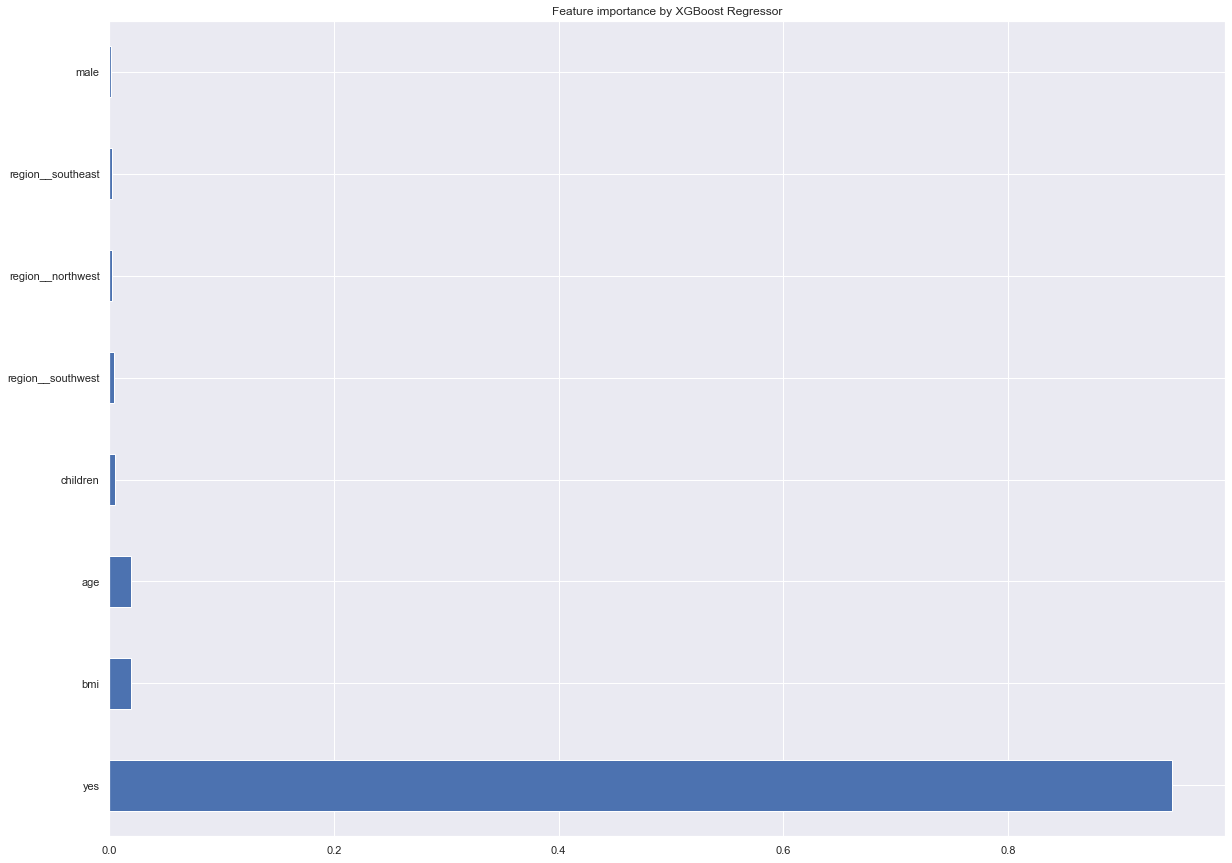

In [77]:
# Visualization
xgbr_feature_imp['Feature_importance'].plot(kind='barh',
                                            title='Feature importance by XGBoost Regressor',
                                            figsize=(20,15))
plt.show()

### Inference:
* Here the last three features are contributing very less for the prediction of the target variable. Let's drop them and rebuild the model.

In [78]:
xgbr_top_features = ['age',
                     'male',
                     'bmi',
                     'children',
                     'yes']

In [79]:
X_train_xgbr = X_train[xgbr_top_features]
X_test_xgbr = X_test[xgbr_top_features]

In [80]:
# Fitting on the training data

xgbr2 = XGBRegressor()

params = {'learning_rate': [0.1,0.2,0.5,0.8,1],
          'max_depth': [2,3,4,5,6,7,8,10],
          'subsample': [0.001,0.009,0.01,0.09,0.1,0.4,0.9,1],
          'min_child_weight': [1,2,4,5,8],
          'gamma': [0.0,0.1,0.2,0.3],
          'colsample_bytree': [0.3,0.5,0.7,1.0,1.4],
          'reg_alpha': [0,0.1,0.2,0.4,0.5,0.7,0.9,1,4,8,10,50,100],
          'reg_lambda': [1,4,5,10,20,50,100,200,500,800,1000]}

#Using Randomized search cv
RCV = RandomizedSearchCV(estimator=xgbr2, 
                         param_distributions=params, 
                         n_iter = 10, 
                         scoring='r2', 
                         cv = 10, 
                         verbose=2, 
                         random_state=42, 
                         n_jobs=-1, 
                         return_train_score=True)

RCV.fit(X_train_xgbr,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
                                                             1.4],
                                        'gamma': [0.0, 0.1, 0.2, 0.3],
                                        'learning_rat

In [81]:
# Best estimator
RCV.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1, max_delta_step=0, max_depth=4, min_child_weight=4,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, random_state=0, reg_alpha=0.5,
             reg_lambda=1000, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
xgbr2 = RCV.best_estimator_



xgbr2.fit(X_train_xgbr, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1, max_delta_step=0, max_depth=4, min_child_weight=4,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, random_state=0, reg_alpha=0.5,
             reg_lambda=1000, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
# Predictions on train data

y_pred_train = xgbr2.predict(X_train_xgbr)

In [84]:
# Predictions on test data

y_pred_test = xgbr2.predict(X_test_xgbr)

In [85]:
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_xgbr,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_xgbr,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.8576669305650465
Adj. R2 score of train data is  0.8569016990089446
rmse score of train data is  4565.883916720636

R2 score of test data is  0.848864294494302
Adj. R2 score of train data is  0.8469560153843816
rmse score of test data is  4707.458803493061


In [86]:
#updating in results
results.loc[len(results)] = ['XG Boost regressor',r2_score(y_train,y_pred_train),
                             adjusted_r2_score(X_train_xgbr,y_train,y_pred_train),rmse(y_train,y_pred_train),
                             r2_score(y_test,y_pred_test),adjusted_r2_score(X_test_xgbr,y_test,y_pred_test),rmse(y_test,y_pred_test)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Ridge Regression,0.737885,0.735623,0.099111,0.777181,0.772646,0.090791
1,Lasso Regression,0.737868,0.735606,0.099114,0.777152,0.772615,0.090797
2,Random Forest regressor,0.861690,0.860947,4500.888495,0.868135,0.866470,4397.118256
3,XG Boost regressor,0.857667,0.856902,4565.883917,0.848864,0.846956,4707.458803


In [87]:
#saving the final model

import sklearn.externals as extjoblib
import joblib
# Save the model as a pickle in a file
joblib.dump(xgbr2, r'G:\AI-Projects\InsurancePremiumPrediction\xgb_model.pkl')

['G:\\AI-Projects\\InsurancePremiumPrediction\\xgb_model.pkl']